<a href="https://colab.research.google.com/github/signofcommunication/Bible-of-Competitive-Programming/blob/main/UAS_AI_%7C_Jeriko_Ichtus_Seo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Masukkan kecepatan (km/jam, 0-100): 100
Masukkan beban mesin (kg, 0-200): 150
Masukkan suhu lingkungan (°C, 20-40): 30
Rekomendasi Bukaan Karburator: 81.94%


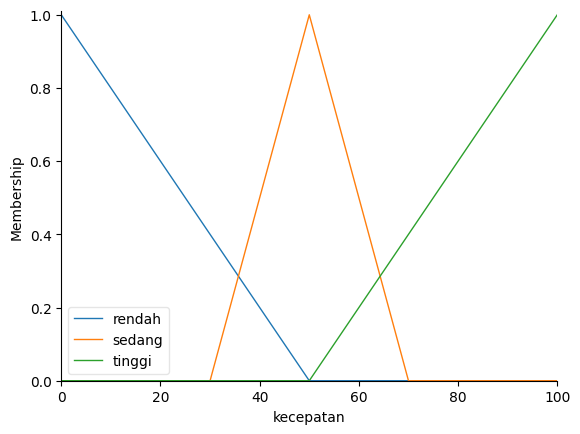

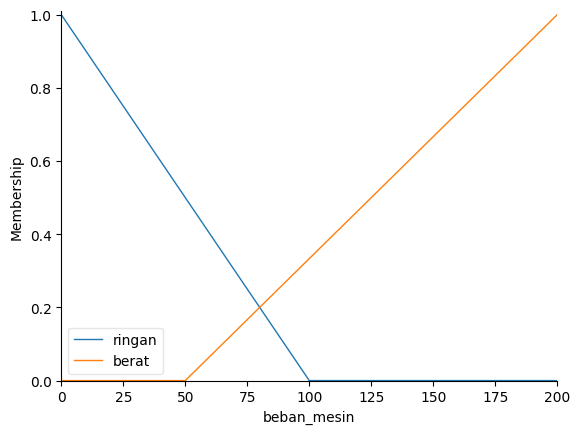

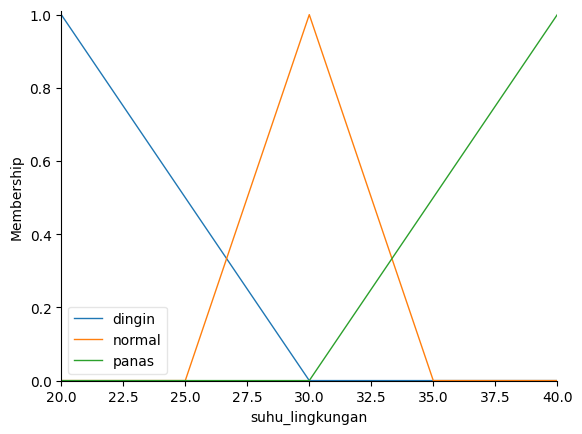

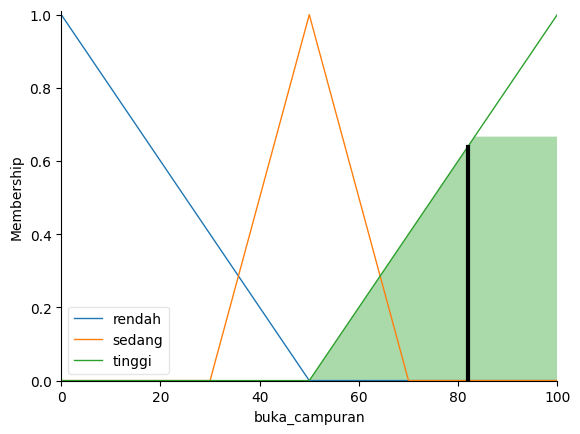

In [9]:
# Variabel input dan output
kecepatan = ctrl.Antecedent(np.arange(0, 101, 1), 'kecepatan')  # km/jam
beban_mesin = ctrl.Antecedent(np.arange(0, 201, 1), 'beban_mesin')  # kg
suhu_lingkungan = ctrl.Antecedent(np.arange(20, 41, 1), 'suhu_lingkungan')  # °C
buka_campuran = ctrl.Consequent(np.arange(0, 101, 1), 'buka_campuran')  # % (persentase bukaan karburator)

# Fungsi membership untuk variabel input
kecepatan['rendah'] = fuzz.trimf(kecepatan.universe, [0, 0, 50])  # Prioritas efisiensi pada kecepatan rendah
kecepatan['sedang'] = fuzz.trimf(kecepatan.universe, [30, 50, 70])
kecepatan['tinggi'] = fuzz.trimf(kecepatan.universe, [50, 100, 100])

beban_mesin['ringan'] = fuzz.trimf(beban_mesin.universe, [0, 0, 100])  # Untuk beban ringan
beban_mesin['berat'] = fuzz.trimf(beban_mesin.universe, [50, 200, 200])

suhu_lingkungan['dingin'] = fuzz.trimf(suhu_lingkungan.universe, [20, 20, 30])
suhu_lingkungan['normal'] = fuzz.trimf(suhu_lingkungan.universe, [25, 30, 35])
suhu_lingkungan['panas'] = fuzz.trimf(suhu_lingkungan.universe, [30, 40, 40])

# Fungsi keanggotaan untuk variabel output
buka_campuran['rendah'] = fuzz.trimf(buka_campuran.universe, [0, 0, 50])  # Campuran ramping untuk efisiensi
buka_campuran['sedang'] = fuzz.trimf(buka_campuran.universe, [30, 50, 70])
buka_campuran['tinggi'] = fuzz.trimf(buka_campuran.universe, [50, 100, 100])

# 54 aturan fuzzy berdasarkan kombinasi 3x2x3 (perbaikan duplikat)
rules = [
    # Kecepatan Rendah
    ctrl.Rule(kecepatan['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['rendah']),
    ctrl.Rule(kecepatan['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['rendah']),
    ctrl.Rule(kecepatan['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),

    # Kecepatan Sedang
    ctrl.Rule(kecepatan['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['rendah']),
    ctrl.Rule(kecepatan['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),

    # Kecepatan Tinggi
    ctrl.Rule(kecepatan['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
]

# Buat sistem kontrol
sistem_kontrol = ctrl.ControlSystem(rules)
simulasi = ctrl.ControlSystemSimulation(sistem_kontrol)

# Ambil input dari pengguna
try:
    kecepatan_input = float(input("Masukkan kecepatan (km/jam, 0-100): "))
    if not (0 <= kecepatan_input <= 100):
        raise ValueError("Kecepatan harus antara 0 dan 100 km/jam.")

    beban_input = float(input("Masukkan beban mesin (kg, 0-200): "))
    if not (0 <= beban_input <= 200):
        raise ValueError("Beban mesin harus antara 0 dan 200 kg.")

    suhu_input = float(input("Masukkan suhu lingkungan (°C, 20-40): "))
    if not (20 <= suhu_input <= 40):
        raise ValueError("Suhu lingkungan harus antara 20 dan 40°C.")

    # Masukkan input ke simulasi
    simulasi.input['kecepatan'] = kecepatan_input
    simulasi.input['beban_mesin'] = beban_input
    simulasi.input['suhu_lingkungan'] = suhu_input

    # Jalankan inferensi
    simulasi.compute()

    # Tampilkan hasil (diinterpretasikan sebagai rekomendasi bukaan karburator)
    persentase = simulasi.output['buka_campuran']
    print(f"Rekomendasi Bukaan Karburator: {persentase:.2f}%")

    # Visualisasi fungsi keanggotaan
    kecepatan.view()
    beban_mesin.view()
    suhu_lingkungan.view()
    buka_campuran.view(sim=simulasi)
    plt.show()

except ValueError as e:
    print(f"Error: {e}. Silakan masukkan nilai yang valid.")